# Аналитика по недвижимости

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sqlite3
import json
import seaborn

# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

/tmp/ipykernel_195487/4149783573.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
connection = sqlite3.connect('/home/synchronize_data/price_analytics/db.sqlite3')
cursor = connection.cursor()

# Получить только квартиры

In [ ]:
cursor.execute("""
SELECT 
            id,
            "title",
            "price",
            "price_sale",
            CAST(apartment_area as decimal) as apartment_area_decimal,
            CAST(price_sale / apartment_area as decimal(15,2)) as "avg_price_per_metr",
            date(datetime_create) as date,
            
            "category",
            "brand",
            "brand_url",
            "url",

            "apartment_area",
            "apartment_completion_quarter",
            "apartment_completion_year",
            "apartment_floor",
            "apartment_floors_total",
            "apartment_ceilingheight",
            "apartment_room",
            "apartment_ppm",
            "apartment_address",
            "apartment_location_lat",
            "apartment_location_lon"

            
    
FROM products_history
where 
    category = "Новостройки"
    --and datetime_create >= "2022-01-17"
    --and 
    --and url like "hhttps://donstroy.moscow/objects/ostrov/plans/quarter6/korpus1/%"
    --and title like "%Остров.6%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 1431

""")

all_room = pd.DataFrame(cursor.fetchall())

# Статистика продажи level по дням

In [3]:
cursor.execute("""
WITH sales_numbered AS (
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    date(datetime_create) as date
    
FROM products_history
where 
    --datetime_create >= "2022-01-17"
    --and 
    url like "%level.ru%"
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 1411111
)

SELECT 
    cast(sum(price_sale) as int),
    cast(sum(apartment_area) as int),
    cast(avg(price_sale / apartment_area) as int),
    cast(sum(price_sale) / sum(apartment_area) as int),
    avg(apartment_area),
    avg(price_sale),
    count(id),
    date
    
FROM sales_numbered

group by date
ORDER BY date
LIMIT 631  
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "sum price_sale",
    "sum apartment_area",
    "avg price per metr",
    "avg sum price per sum metr",
    "avg apartment_area",
    "avg price",
    "count",
    "date"
])

In [4]:
df = df.dropna()

Text(0, 0.5, 'количество представленных квартир для продажи в комапании')

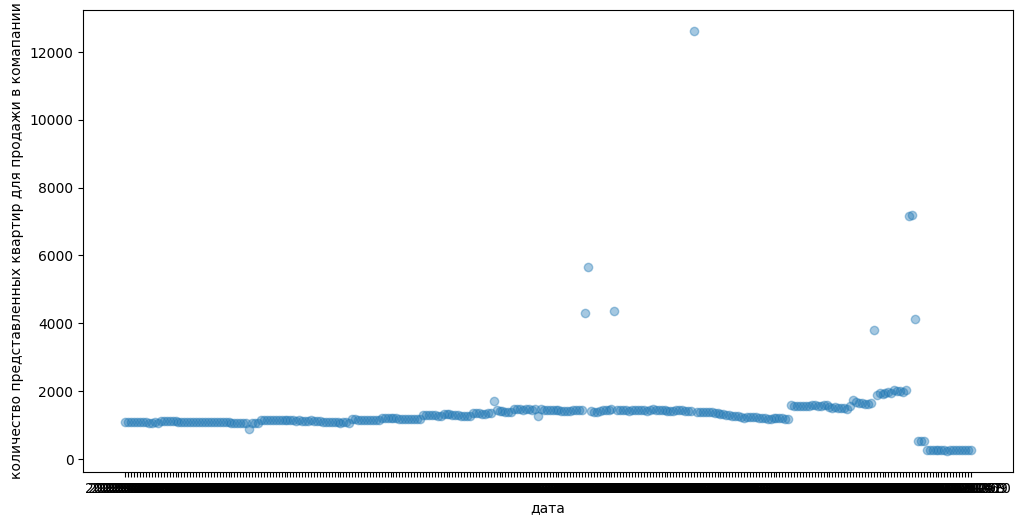

In [5]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["count"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество представленных квартир для продажи в комапании")
#plt.ylim(10,120)

Text(0, 0.5, 'среденяя цена квартир представленных для продажи в комапании')

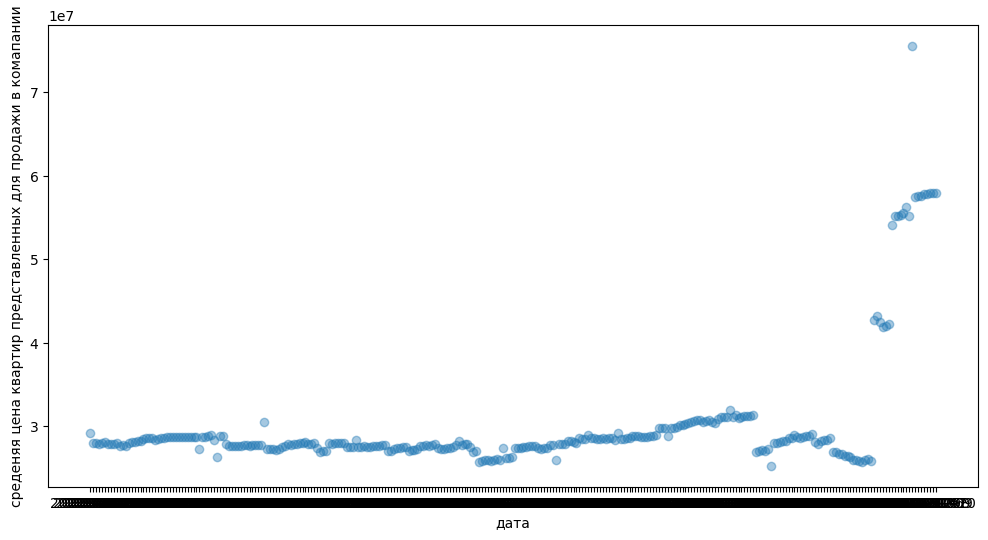

In [6]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["avg price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квартир представленных для продажи в комапании")

Text(0, 0.5, 'среденяя цена квадратного метра квартир представленных для продажи в комапании')

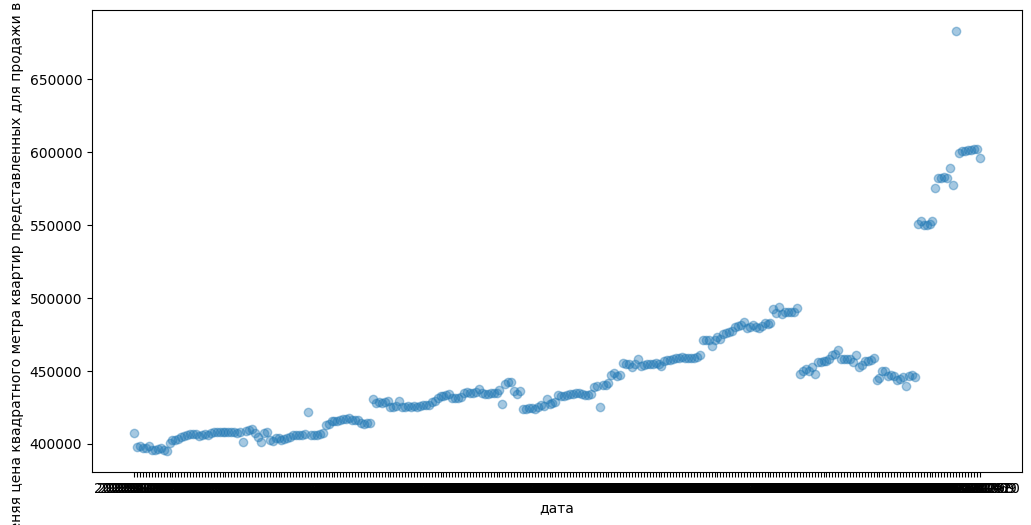

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["avg price per metr"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")

In [8]:
#seaborn.pairplot(df_price_sale__apartment_area)

# Статистика продажи донстроя по дням

In [9]:
cursor.execute("""
WITH sales_numbered AS (
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    date(datetime_create) as date
    
FROM products_history
where 
    --datetime_create >= "2022-01-17"
    --and 
    url like "https://donstroy.moscow%"
    --and title like "%Остров.6%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 1431111
)

SELECT 
    cast(sum(price_sale) as int),
    cast(sum(apartment_area) as int),
    cast(avg(price_sale / apartment_area) as int),
    cast(sum(price_sale) / sum(apartment_area) as int),
    avg(apartment_area),
    avg(price_sale),
    count(id),
    date
    
FROM sales_numbered

group by date
ORDER BY date
LIMIT 631  
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "sum price_sale",
    "sum apartment_area",
    "avg price per metr",
    "avg sum price per sum metr",
    "avg apartment_area",
    "avg price",
    "count",
    "date"
])

In [10]:
df

,sum price_sale,sum apartment_area,avg price per metr,avg sum price per sum metr,avg apartment_area,avg price,count,date
0,236608760,315,370872,749948,28.681818,1.075494e+07,22,2024-02-09
1,50797723819,97699,518528,519940,80.477018,4.184327e+07,1214,2024-02-10


In [11]:
df = df.dropna()

Text(0, 0.5, 'количество представленных квартир для продажи в комапании')

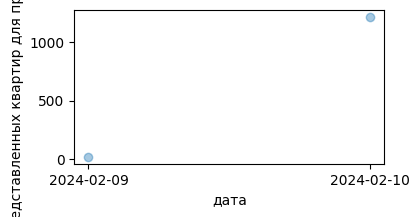

In [12]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["count"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество представленных квартир для продажи в комапании")

Text(0, 0.5, 'среденяя цена квартир представленных для продажи в комапании')

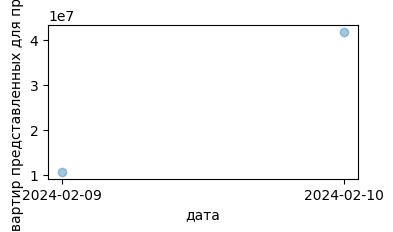

In [13]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["avg price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квартир представленных для продажи в комапании")

Text(0, 0.5, 'среденяя цена квадратного метра квартир представленных для продажи в комапании')

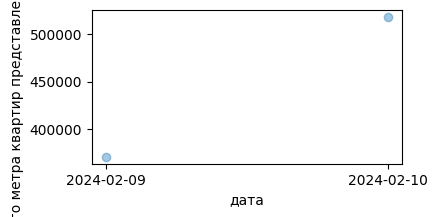

In [14]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["avg price per metr"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")

In [15]:
#seaborn.pairplot(df_price_sale__apartment_area)

# Статистика продажи донстроя жк Остров по дням

In [ ]:
cursor.execute("""
WITH sales_numbered AS (
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    date(datetime_create) as date
    
FROM products_history
where 
    --datetime_create >= "2022-01-17"
    --and 
    url like "https://donstroy.moscow/objects/ostrov/%"
    and title like "%Остров%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 1431111
)

SELECT 
    cast(sum(price_sale) as int),
    cast(sum(apartment_area) as int),
    cast(avg(price_sale / apartment_area) as int),
    cast(sum(price_sale) / sum(apartment_area) as int),
    avg(apartment_area),
    avg(price_sale),
    count(id),
    date
    
FROM sales_numbered

group by date
ORDER BY date
LIMIT 631  
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "sum price_sale",
    "sum apartment_area",
    "avg price per metr",
    "avg sum price per sum metr",
    "avg apartment_area",
    "avg price",
    "count",
    "date"
])

In [ ]:
df = df.dropna()

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["count"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество представленных квартир для продажи в комапании")
#plt.ylim(10,120)

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["avg price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квартир представленных для продажи в комапании")

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["avg price per metr"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")

In [ ]:
#seaborn.pairplot(df_price_sale__apartment_area)

# Статистика продажи донстроя жк Остров 6 по дням

In [ ]:
cursor.execute("""
WITH sales_numbered AS (
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    date(datetime_create) as date
    
FROM products_history
where 
    --datetime_create >= "2022-01-17"
    --and 
    url like "https://donstroy.moscow/objects/ostrov/plans/quarter6/%",
    and title like "%Остров.6%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 1431111
)

SELECT 
    cast(sum(price_sale) as int),
    cast(sum(apartment_area) as int),
    cast(avg(price_sale / apartment_area) as int),
    cast(sum(price_sale) / sum(apartment_area) as int),
    avg(apartment_area),
    avg(price_sale),
    count(id),
    date
    
FROM sales_numbered

group by date
ORDER BY date
LIMIT 631  
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "sum price_sale",
    "sum apartment_area",
    "avg price per metr",
    "avg sum price per sum metr",
    "avg apartment_area",
    "avg price",
    "count",
    "date"
])

In [ ]:
df

In [ ]:
df = df.dropna()

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["count"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество представленных квартир для продажи в комапании")
#plt.ylim(10,120)

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["avg price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квартир представленных для продажи в комапании")

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["avg price per metr"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")

In [ ]:
seaborn.pairplot(df.drop(['price', 
                          'apartment_ppm',
                          'title', 
                          'datetime_create', 
                          'category', 
                          'source_url', 
                          'apartment_address','apartment_location_lat','apartment_location_lon'], axis=1 ))

In [ ]:
#seaborn.pairplot(df_price_sale__apartment_area)

# Статистика продажи донстроя жк Остров 6 корпус 1 по дням

In [ ]:
cursor.execute("""
WITH sales_numbered AS (
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    date(datetime_create) as date
    
FROM products_history
where 
    --datetime_create >= "2022-01-17"
    --and 
    url like "hhttps://donstroy.moscow/objects/ostrov/plans/quarter6/korpus1/%"
    and title like "%Остров.6%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 1431111
)

SELECT 
    cast(sum(price_sale) as int),
    cast(sum(apartment_area) as int),
    cast(avg(price_sale / apartment_area) as int),
    cast(sum(price_sale) / sum(apartment_area) as int),
    avg(apartment_area),
    avg(price_sale),
    count(id),
    date
    
FROM sales_numbered

group by date
ORDER BY date
LIMIT 631  
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "sum price_sale",
    "sum apartment_area",
    "avg price per metr",
    "avg sum price per sum metr",
    "avg apartment_area",
    "avg price",
    "count",
    "date"
])

In [ ]:
df = df.dropna()

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["count"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("количество представленных квартир для продажи в комапании")
#plt.ylim(10,120)

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["avg price"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квартир представленных для продажи в комапании")

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["avg price per metr"], alpha=0.4)
plt.xlabel("дата")
plt.ylabel("среденяя цена квадратного метра квартир представленных для продажи в комапании")

In [ ]:
seaborn.pairplot(df.drop(['price', 
                          'apartment_ppm',
                          'title', 
                          'datetime_create', 
                          'category', 
                          'source_url', 
                          'apartment_address','apartment_location_lat','apartment_location_lon'], axis=1 ))